# Resources
- https://github.com/krishnaik06/Predicting-Heart-Disease/blob/master/Heart%20Disease%20Predictions.ipynb
- https://www.youtube.com/watch?v=75OJvlhFUMY 

# To do:
- Eda , bayesian test 
- write knearest from scratch 
- add metric description 

In [ ]:
# knearest  from scratch + auto encoders
#  feature selection 

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid') 
rcParams['figure.figsize'] = (12, 7) # define plot sizes

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# I will add auto encoders and stacking 

df = pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 1.EDA 
check for imbalanced data set , use precision and recall , data undersampleing

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3.030000e+02
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,5.445545e+01
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,1.423436e-14
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.445545e+01
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,5.445545e+01
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,5.445545e+01
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,5.445545e+01
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,5.445545e+01


I there any correlation ? 
- Therea are no clear patterns

<AxesSubplot:>

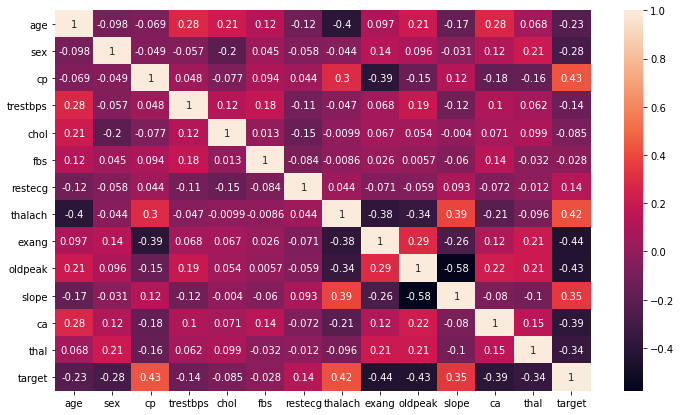

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr() , annot =True)

In [115]:
# the imbalance is not an issue
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

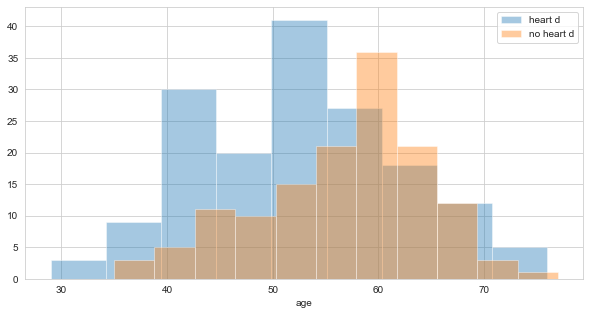

In [114]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['target'] ==1].age , kde = False , label = 'heart d')
sns.distplot(df[df['target'] ==0].age , kde = False, label = 'no heart d')
plt.legend()

<AxesSubplot:xlabel='age'>

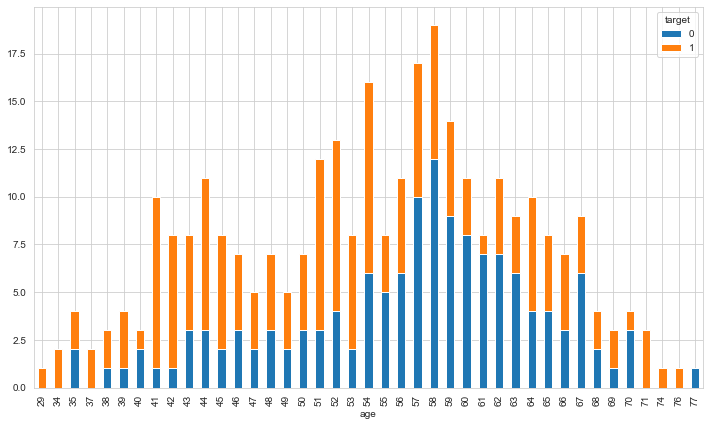

In [59]:
df.groupby(['age' , 'target' ])['target'].size().unstack().plot(kind='bar', stacked=True)

In [116]:
pct_df = pd.DataFrame(df[df.target == 1].age.value_counts())

pct_df['all_cols'] = df.age.value_counts()

In [117]:
pct_df =  pct_df.rename(columns = {'age':'positive' } )

In [118]:
pct_df.head()

,positive,all_cols
54,10,16
41,9,10
51,9,12
52,9,13
44,8,11


In [119]:
pct_df['pct'] = (pct_df.positive /  pct_df.all_cols) *100 

<AxesSubplot:>

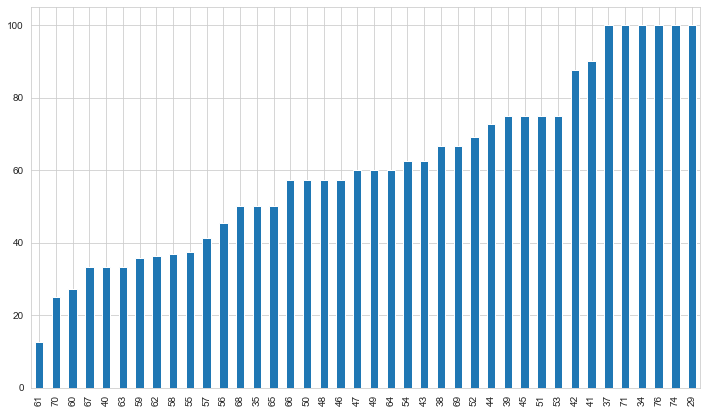

In [120]:
# Note: The number of patients is to small to do a proper analysis  

pct_df.sort_values(by='pct').pct.plot(kind='bar')

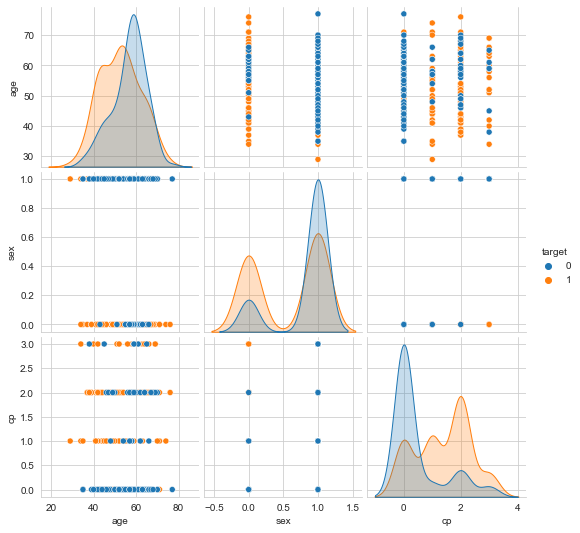

In [130]:
# Pairplot on specific columns

sns.pairplot(df[['age','sex' ,'cp' , 'target']] , hue ='target' )

In [ ]:
# is there any patterns in bunch with heart deseasse 

In [146]:
# Age 
df.groupby('target')['age'].agg({'mean' ,'sum' , max , min})

,min,mean,sum,max
target,,,,
0,35,56.601449,7811,77
1,29,52.496970,8662,76


In [148]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'test'],
      dtype='object')

In [149]:
# Sex 
df.groupby('target')['chol'].agg({'mean' ,'sum' , max , min})

,min,mean,sum,max
target,,,,
0,131,251.086957,34650,409
1,126,242.230303,39968,564


### 1.2 Is there a relationship between ..

**Chisquare test**

In [177]:
import scipy.stats as stats

# 1 Create a crosstab table

dataset_table = pd.crosstab(df['fbs'],df['target'])
dataset_table

target,0,1
fbs,,
0,116,142
1,22,23


In [174]:
def chi2_wrapper(col_to_test = 'sex' , target_col = 'target' , alpha = 0.05 ):
    print(f'Result for {col_to_test}:')
    dataset_table = pd.crosstab(df[col_to_test],df[target_col])
    Observed_Values = dataset_table.values 
    val = stats.chi2_contingency(dataset_table)
    Expected_Values= val[3] # the 3 is the location of this calculation 
    no_of_rows = len(dataset_table.iloc[0:2,0]) # in this case we have 2 columns and 2 rows 
    no_of_columns=len(dataset_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1) # degreee of freedom 
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=ddof)
#     print('p-value:',p_value)
#     print('Significance level: ',alpha)
#     print('Degree of Freedom: ',ddof)
#     print('p-value:',p_value)
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")


In [175]:
# loop through all the columns
for col in list(df.columns):
    chi2_wrapper(col_to_test = col , target_col = 'target' , alpha = 0.05 )


Result for age:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for sex:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for cp:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for trestbps:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for chol:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
Result for fbs:
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
Result for restecg:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is 

we coould comprare this with feature importance 

## 2. Feature selection 

## 3. Modelling
- knearest from scratch
- use elbow method for knearest 
- autoencoders 
- here we will also test the normalization mehtods 
- test diferent normalization methods 

### 3.1 Autoencoders

In [ ]:
# 1 Create the model

# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

## Request 

In [12]:
import datetime
# # 1 Get the current path 

# s = ! pwd
# current_path = ''
# for i in s: 
#     current_path+= i
# 2 Pull request
! git pull

# 3
now = datetime.datetime.now()
commit_message = "Last run on " + str(now)
! cd '/Users/Tabe/Desktop/Courses/Data-Science /Test-Projects/Machine-Learning-Projects/Machine-Learning-Projects/Auto-encoders for classification'
! echo $commit_message > commit_message.txt
! git add . 
! git commit -F commit_message.txt
! git push origin main # here I choose either master or branch 
print ('Done!')

Already up to date.
/bin/bash: line 0: cd: /Users/Tabe/Desktop/Courses/Data-Science /Test-Projects/Machine-Learning-Projects/Machine-Learning-Projects/Auto-encoders for classification: No such file or directory
[main 2e66fac] Last run on 2020-12-12 16:56:06.562189
 5 files changed, 1148 insertions(+), 4 deletions(-)
 create mode 100644 Auto-encoders for classification /.DS_Store
 create mode 100644 Auto-encoders for classification /heart.csv
Enumerating objects: 15, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 4 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (9/9), 9.32 KiB | 2.33 MiB/s, done.
Total 9 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/tabers77/Machine-Learning-Projects.git
   8a3cb96..2e66fac  main -> main
Done!
